In [1]:
# 库导入与 Tesseract 路径配置
from PIL import Image, ImageOps, ImageFilter
import pytesseract
import matplotlib.pyplot as plt
import os

# === WINDOWS 配置 (请根据实际路径修改) ===
# pytesseract.pytesseract.tesseract_cmd = r'd:\Tesseract-OCR\tesseract.exe'

# 检查是否安装
try:
    ver = pytesseract.get_tesseract_version()
    print(f"✅ Tesseract Version: {ver}")
except Exception as e:
    print("❌ Tesseract 未找到，请确保已安装并配置路径。")
    print("下载地址: https://github.com/UB-Mannheim/tesseract/wiki")




✅ Tesseract Version: 5.5.0.20241111


In [2]:
# 图像加载与展示函数
def show_image(img, title="Image"):
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap='gray' if img.mode == 'L' else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 创建一个简单的测试图片（如果本地没有图片）
from PIL import ImageDraw, ImageFont

img = Image.new('RGB', (400, 100), color=(255, 255, 255))
d = ImageDraw.Draw(img)
d.text((10, 10), "Hello Python OCR\nMagic Box 2026", fill=(0, 0, 0))
img.save("test_ocr.png")



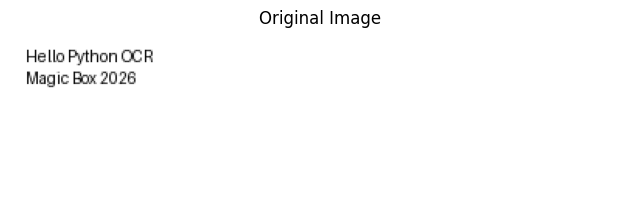

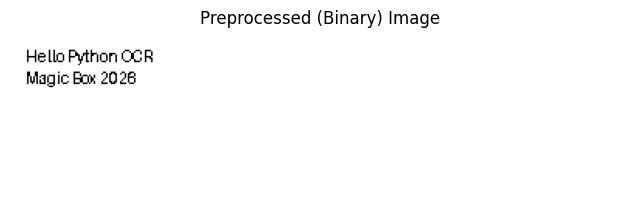

In [3]:
# 图像预处理 (提高识别率)
original_img = Image.open("test_ocr.png")
show_image(original_img, "Original Image")

# 1. 灰度化
gray_img = ImageOps.grayscale(original_img)

# 2. 二值化 (Thresholding) - 去除噪点
threshold = 150
binary_img = gray_img.point(lambda p: 255 if p > threshold else 0)
show_image(binary_img, "Preprocessed (Binary) Image")



In [4]:
# 执行 OCR 文本提取
custom_config = r'--oem 3 --psm 6' # OEM: 引擎模式, PSM: 页面分割模式
text = pytesseract.image_to_string(binary_img, config=custom_config)

print("=== 识别结果 ===")
print(f"📄 Text Content:\n{'-'*20}\n{text}\n{'-'*20}")



=== 识别结果 ===
📄 Text Content:
--------------------
Helio Python OCR
Magic Box 2028

--------------------


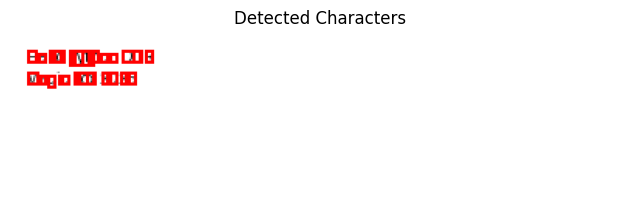

In [6]:
# 获取每个字符的边框 (Bounding Boxes)
# 这在需要知道文字具体位置时非常有用
boxes = pytesseract.image_to_boxes(binary_img)
img_with_boxes = original_img.copy()
draw = ImageDraw.Draw(img_with_boxes)

width, height = img_with_boxes.size
for b in boxes.splitlines():
    b = b.split(' ')
    char, x, y, w, h = b[0], int(b[1]), int(b[2]), int(b[3]), int(b[4])
    # Tesseract 的坐标原点在左下角，PIL 在左上角，需要转换
    draw.rectangle([x, height - h, w, height - y], outline="red", width=2)

show_image(img_with_boxes, "Detected Characters")